In [1]:
#pip install bs4

In [2]:
#pip install tabulate

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import os

In [4]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'
  
SHORT_HEADERS = ['SNo', 'State','Indian-Confirmed', 
                 'Foreign-Confirmed','Cured','Death'] 
  
response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 
  
stats = [] 
all_rows = soup.find_all('tr') 
  
for row in all_rows: 
    stat = extract_contents(row.find_all('td')) 
    if stat: 
        if len(stat) == 5: 
            # last row 
            stat = ['', *stat] 
            stats.append(stat) 
        elif len(stat) == 6: 
            stats.append(stat) 
  
stats[-1][0] = "Total Cases"
  


In [5]:

objects = [] 
for row in stats : 
    objects.append(row[2])  
  
y_pos = (objects) 

performance = [] 
for row in stats : 
    performance.append((row[3]))
  
table = tabulate(stats, headers=SHORT_HEADERS) 
print(table) 
  


SNo            State  Indian-Confirmed               Foreign-Confirmed    Cured    Death
-----------  -------  ---------------------------  -------------------  -------  -------
                   1  Andhra Pradesh                                23        1        0
                   2  Andaman and Nicobar Islands                    9        0        0
                   3  Bihar                                         15        0        1
                   4  Chandigarh                                     8        0        0
                   5  Chhattisgarh                                   7        0        0
                   6  Delhi                                         87        6        2
                   7  Goa                                            5        0        0
                   8  Gujarat                                       69        1        6
                   9  Haryana                                       36       18        0
                  10 

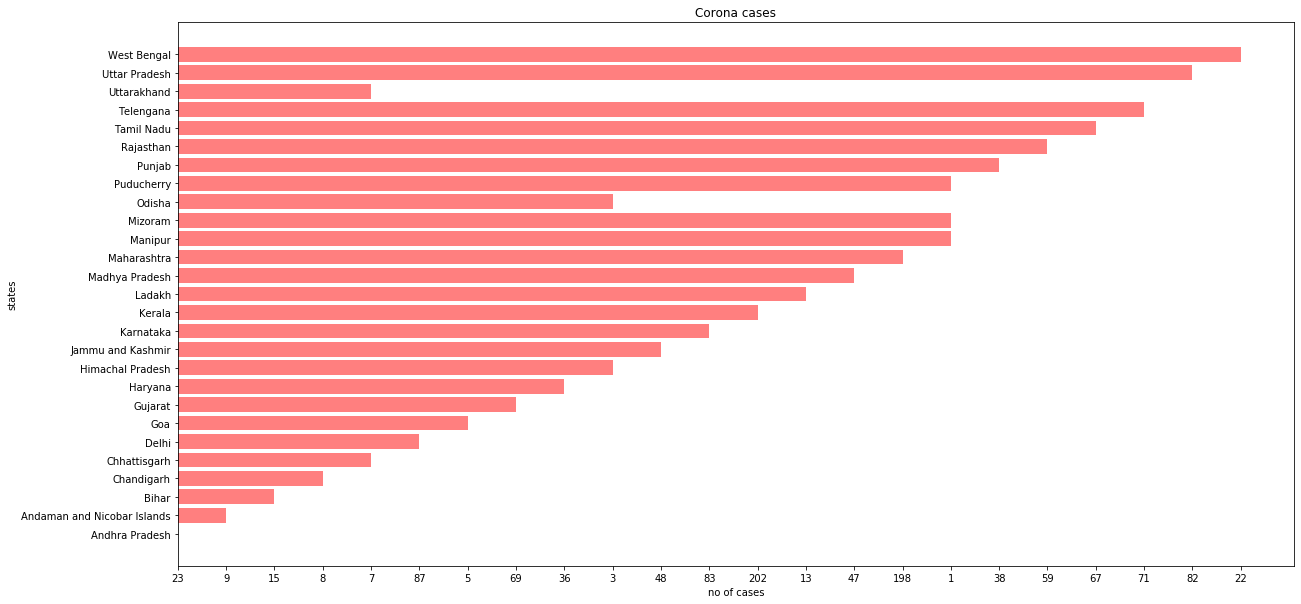

In [6]:
plt.figure(figsize=(20,10))
plt.barh(y_pos,performance,align='center', alpha=0.5,color='r') 
plt.ylabel('states')
plt.xlabel('no of cases')
plt.title('Corona cases')
plt.show()

###### restart kernel for updated values.... user needed to be connected to internet for latest update.

In [7]:
pwd

'C:\\Users\\anku'

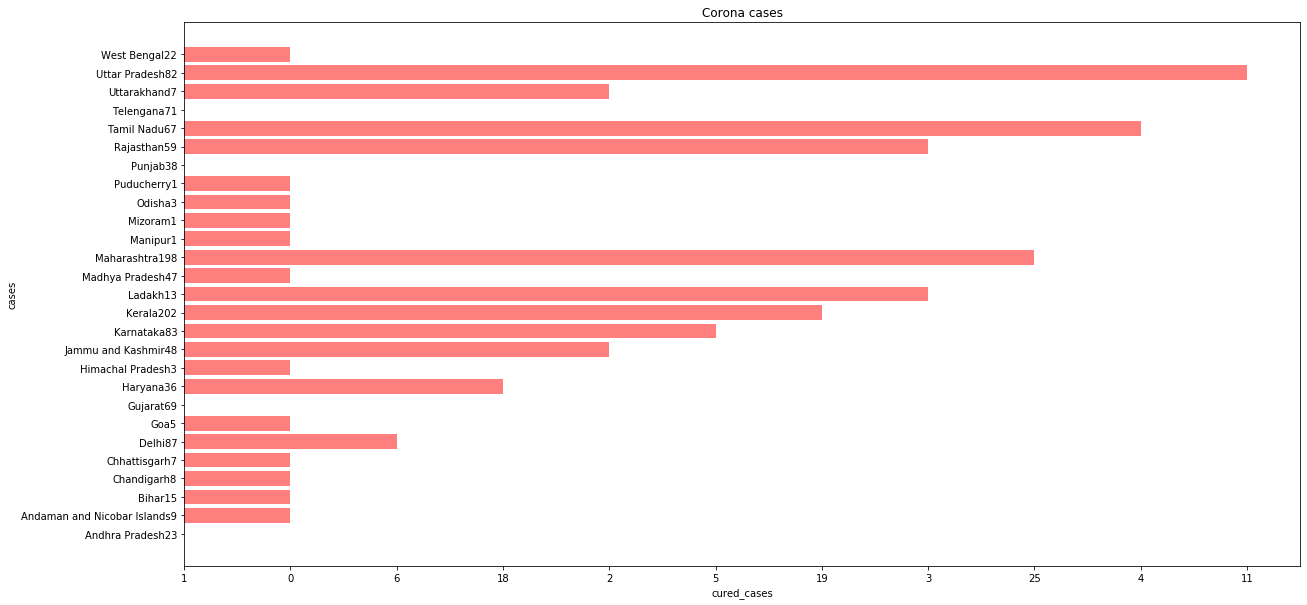

In [8]:
cases = [] 
for row in stats : 
    cases.append(row[2]+row[3])  
  
cases = (cases) 

cured_cases = [] 
for row in stats : 
    cured_cases.append((row[4]))

    
    
plt.figure(figsize=(20,10))
plt.barh(cases,cured_cases,align='center', alpha=0.5,color='r') 
plt.ylabel('cases')
plt.xlabel('cured_cases')
plt.title('Corona cases')
plt.show()
  

  